In [3]:
from scipy.stats import norm
import numpy as np

In [7]:
norm.ppf(q=0.05, loc=180, scale=10/np.sqrt(8))

174.18456423161663

--> Verwerfungsbereich: K = (−∞, 174.185)

In [11]:
# P Wert berechnen
norm.cdf(x=171.54, loc=180, scale=10/np.sqrt(8))

0.008359052027838012

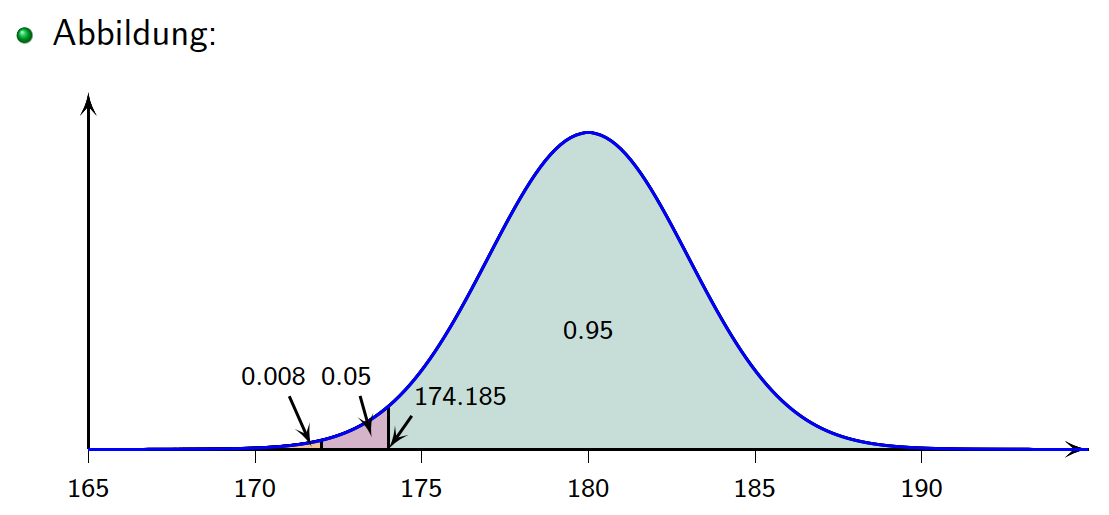

# Fehler in Statistischen Hypothesentests: 

Vorgegeben: Signifikanzniveau α (Üblich 5%, manchmal auch 1%, 10%)
            Verwerfungsbereich K wird so berechnet, dass die Wahrscheinlichkeit dass die Teststatistik in K fällt, genau α ist. --> P(X̄ ∈ K) = α
        
### Entscheidung: Verwerfe H₀, falls X̄ ∈ K
- Fehler 1. Art: H₀ ist wahr, aber wird verworfen.          
--> Wahrscheinlichkeit P(Fehler 1. Art) = α, unter Annahme H₀ (Nullhypothese) ist wahr.

- Fehler 2. Art: Hₐ ist wahr, wird aber fälschlicherweise nicht verworfen (H₀ wird nicht verworfen, obwohl Hₐ wahr ist)     
--> Wahrscheinlichkeit P(Fehler 2. Art) = β, unter Annahme Hₐ (Alternativhypothese) ist wahr.
--> β = P(Fehler 2. Art) hängt von der Variante von Hₐ ab, die wir annehmen, d.h. vom wahren Erwartungswert (μ ≠ μ₀)


### Wichtige Grundsätze: 
- Fehler 1. Art werden kontrolliert (unwarhscheinlich)
- Über Fehler 2. Art haben wir keine Kontrolle. 
- __Trade-Off__: Je kleiner α, desto größer β und umgekehrt. (bei festem μ, n)


# Macht eines Hypothesentests (engl. power)
Macht = 1 - β (Gegenwahrscheinlichkeit zu Fehler 2. Art) = P(H₀ wird korrekterweise verworfen)

### t-Test
- __Modell:__ X₁, ..., Xₙ iid Xi ~ N(μ, σ²)   
- __Bisher:__ σ bekannt (z-Test)  
- __Jetzt:__ σ unbekannt (t-Test), aber Schätzwert aus den Daten berechnen.   
          σ̂² (mit Dach) = S² = 1/(n-1) * ∑ⁿᵢ₌₁(Xᵢ - X̄)² (n-1) -> Stichprobenvarianz
# 
- __Nullhypothese:__ H₀: μ = μ₀   
- __Alternativhypothese:__ Hₐ: μ ≠ μ₀ (zweiseitig), μ < μ₀ oder μ > μ₀ (einseitig)
- __Teststatistik:__ T = (X̄ₙ - μ₀) / (σ̂ / √n) = (Beobachtet - erwartet) / Geschätzter Standardfehler



### T ist __nicht__ normalverteilt, sondern "längerschwänziger"
--> T-Verteilung mit 

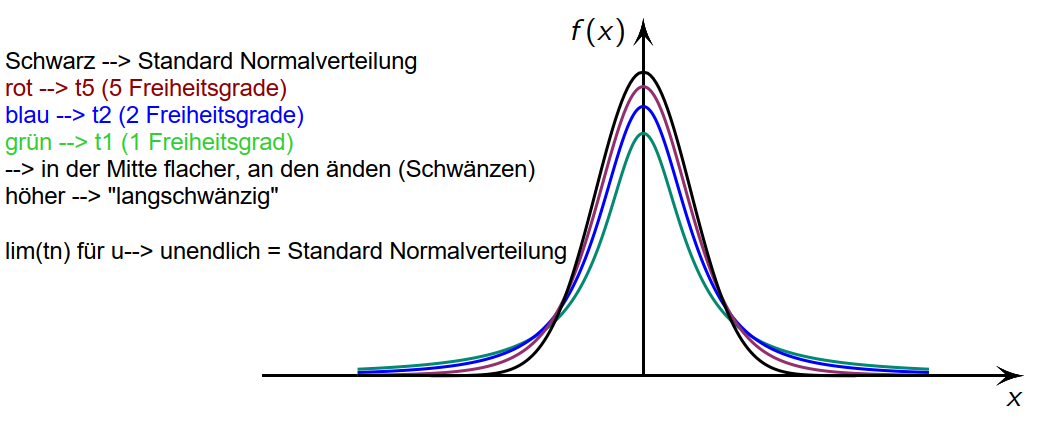

- Für Verwerfungsbereich: t.cdf(), anstatt norm.cdf()     
- verwenden Achtung: df = ... (degree of freedom) nicht vergessen

- Vermutung: x1, x2, . . . , x20 Realisierungen von     
Xi ∼ N (5, σₓ²)
- σX unbekannt → σX also aus Daten schätzen

In [25]:
import numpy as np
from pandas import Series
from scipy.stats import t
import scipy.stats as st


x = Series([5.9, 3.4, 6.6, 6.3, 4.2, 2.0, 6.0, 4.8, 4.2, 2.1,
    8.7, 4.4, 5.1, 2.7, 8.5, 5.8, 4.9, 5.3, 5.5, 7.9])

n = x.size      # Anzahl der Beobachtungen
mu = x.mean()   # Mittelwert
mu0 = 5         # Erwartungswert
sigma = x.std() # Standardabweichung
alpha = 0.05    # Signifikanzniveau 5%

# Verwerfungsbereich
K = t.ppf(
    q = [alpha/2, 1-alpha/2],
    loc = mu0,
    scale = sigma/np.sqrt(n),
    df = n-1)

print(f'Verwerfungsbereich K = (-∞, {K[0]}) U ({K[1]}, +∞)')


Verwerfungsbereich K = (-∞, 4.118353456697872) U (5.881646543302128, +∞)


In [26]:
# P Wert (mu>mu0)
p = 2*(1-t.cdf(x=mu,
    loc=mu0,
    scale=sigma/np.sqrt(n),
    df=n-1))

print(f'P Wert: {p}')


P Wert: 0.6156438864223501


In [33]:
# Black Box
# Beidsteitig:
print(f'P Wert: {st.ttest_1samp(a=x, popmean=mu0).pvalue}')

# Einseitig (rechtsseitig):
print(f'P Wert (rechtsseitig): {st.ttest_1samp(a=x, popmean=mu0, alternative="greater").pvalue}')

# Einseitig (linksseitig):
print(f'P Wert (linksseitig): {st.ttest_1samp(a=x, popmean=mu0, alternative="less").pvalue}')


P Wert: 0.6156438864223502
P Wert (rechtsseitig): 0.3078219432111751
P Wert (linksseitig): 0.6921780567888249


Bsp: x̄₂₀ = 5.125 > 5 => t = x̄₂₀ - μ₀ / (μ̂  / √n)
- => x̄₂₀ ∉ K        
    =  (-∞, tₐ/₂, μ -1) U (t₁₋ₐ/₂, μ -1, +∞)         
    =  (-∞, 4.12) U (5.88, +∞)


### __Zweiseitiger t-Test:__
- Teststatistik: T = (X̄ₙ - μ₀) / (σ̂ / √n)
- Verwerfungsbereich: K = (-∞, -t) U (t, +∞)
    Wobei, t= tₐ/₂, μ -1
# 
__Testentscheid__: Verwirf H₀, falls:
- T ≤ -t oder T ≥ t

Ungekerht; Verwerf H₀ nicht, falls:
- -t < T < t

Dies passiert mit Wahrscheinlichkeit 1-α (unter H0 - wahrer Erwartungswert μ₀)

Jetzt: Standardabweichung mit wahrem Erwartungswert μ₀, dann müssen wir H₀ annehmen, falls:
(X̂ - μ) / (σ̂ / √n)


Stelle ungleichungen um
- T = (X̄ₙ - μ₀) / (σ̂ / √n) < t ==> * (σ̂ / √n) ==> X̄ - μ₀ < t * (σ̂ / √n)
- -μ < -X̂μ + t*(σ̂/√n)
- μ > X̂ - t*(σ̂/√n)

Mit Wahrscheinlichkeit 1-α gilt:    
- X̂μ - t*(σ̂/√n) < μ < X̂μ + t*(σ̂/√n)



### __Definiton: (1-α) Vertrauensintervall__
- [X̄ₙ - t*(σ̂/√n), X̄ₙ + t*(σ̂/√n)]        
wobei t = tₐ/₂, n -1
#
__Interpretation:__ mit Wahrscheinlichkeit 1-α liegt der wahre Wert μ in dem Vertrauensintervall.     
__Vorsicht__, das Konfidenzintervall ist zufällig, der wahre Wert μ ist konstant.

